In [135]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,UnbinnedNLL
from stats import toy_Gauss

In [136]:
def f(x):
    return 2*np.sin(.5*x + .78) + .8

In [137]:
x = [.5,2.5,4.5,6.5,8.5,10.5]

In [138]:
def TCL(mean,sigma,n=1000):
        '''toy normal distribution'''

        delta = np.sqrt(3*n)*sigma
        
        return np.average([ np.random.uniform(mean-delta , mean+delta) for j in range(n) ]) 

In [139]:
def gen_data(x,sigma):
    return [f(i) + TCL(mean=0,sigma=sigma) for i in x]

In [140]:
y = [f(i) for i in x]

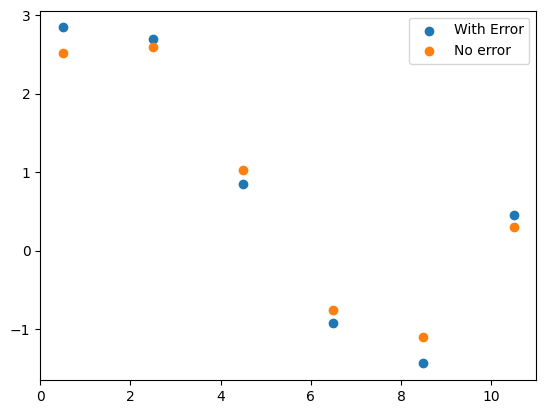

In [141]:
data = gen_data(x,0.3)
plt.scatter(x,data)
plt.scatter(x,y)
plt.legend(['With Error','No error'])
plt.show()

In [142]:
def func(x,p_o,p_1,p_2,p_3):
    return p_o*np.sin(p_1*x+p_2) + p_3

In [166]:
def fit(yerror,func):
    cost = LeastSquares(x,data,yerror,func)
    my_minuit = Minuit(cost, p_o=0,p_1=.5,p_2=0,p_3=0)
    my_minuit.migrad()
    my_minuit.hesse()
    # display(my_minuit)
    return my_minuit

In [179]:
fitted = fit(0.3, func)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted.fval ,fitted.ndof))

Q squared: 0.510504 
Degrees of freedom: 2


In [156]:
def gen_data2(x,sigma1,sigma2):
    return [ ( 2*TCL(1,sigma1))*np.sin( (0.5*TCL(1,sigma1))*i + (0.78*TCL(1,sigma1)) ) + (0.8*TCL(1,sigma1)) + TCL(0,sigma2) for i in x]

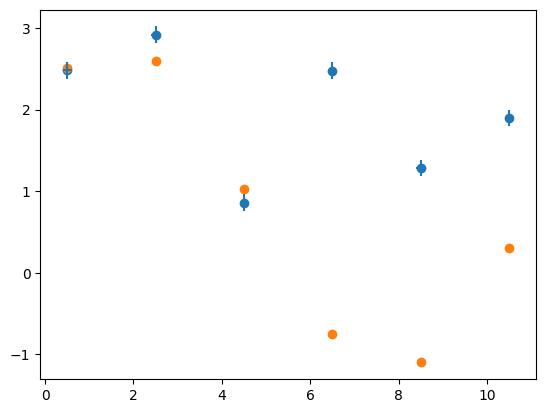

In [180]:
sigma1, sigma2 = .3, 0.1

data2 = gen_data2(x,sigma1,sigma2)
errors = (sigma1**2 + sigma2**2)* np.ones(len(data2))
plt.scatter(x,data2)
plt.scatter(x,y)
plt.errorbar(x,data2,errors,errors, linestyle= 'None')
plt.show()

In [158]:
fitted2 = fit(errors[0], func)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted2.fval ,fitted2.ndof))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.672 (χ²/ndof = 2.8)      │              Nfcn = 152              │
│ EDM = 3.12e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_o  │   2.26    │   0.05    │            │            │         │         │       │
│ 1 │ p_1  │   0.499   │   0.008   │            │            │         │         │       │
│ 2 │ p_2  │   0.86    │   0.06    │            │            │         │         │       │
│ 3 │ p_3  │   0.80    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────┐
│     │      p_o      p_1      p_2      p_3 │
├─────┼─────────────────────────────────────┤
│ p_o │  0.00273  0.09e-3  -0.0005  -0.0001 │
│ p_1 │  0.09e-3 6.57e-05 -0.43e-3 -0.15e-3 │
│ p_2 │  -0.0005 -0.43e-3   0.0034   0.0010 │
│ p_3 │  -0.0001 -0.15e-3   0.0010   0.0017 │
└─────┴─────────────────────────────────────┘

Q squared: 5.671730 
Degrees of freedom: 2
